In [6]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('dark_background')

In [21]:
# Initial Values 
homePrice = 175000
hoA = 250
percDownPay = 0.20
myPreTaxMonthlyIncome = 4000
annualInterestRate = 0.04 
annualTaxRate = 0.0303 #(30.33/1000)/12 # Assumption: https://www.bestplaces.net/housing/zip-code/illinois/glendale_heights/60139; 3.03%/year
mortgageYears = 30


class HomeOwnerCost:
    def __init__(self, homePrice = 175000, hoA = 250, percDownPay = 0.20, myPreTaxMonthlyIncome = 4000, annualInterestRate = 0.04, annualTaxRate = 0.0303, mortgageYears = 30):
        # Init Values
        self.homePrice = homePrice
        self.hoA = hoA 
        self.percDownPay = percDownPay
        self.myPreTaxMonthlyIncome = myPreTaxMonthlyIncome
        self.annualInterestRate = annualInterestRate
        self.annualTaxRate = annualTaxRate
        self.mortageYears = mortgageYears

        # Constants and Factors
        self.closeCostConst_ = 0.04 # 4%
        self.monthMortageAffordFactor_ = 0.28 # 28%

        self.numDiv = 120

    def baseCalculations(self):
        # Basic Calculations
        self.downPayment = self.homePrice*self.percDownPay
        self.loanAmount = self.homePrice - self.downPayment
        self.closingCost = self.closeCostConst_ * self.homePrice
        self.interestRateMonthly = float(self.annualInterestRate/12)
        self.monthlyTaxRate = float(self.annualTaxRate/12)

    def mainCalculation(self):
        """
        For the most part, these change as a function of downpayment, interest rate, loan period, and house cost
        """
        self.monthlyTaxAmount = self.monthlyTaxRate*self.homePrice # Monthly Tax Amount
        self.monthlyMortgageAmount = np.abs(npf.pmt(self.annualInterestRate/12, self.mortageYears*12, self.loanAmount, 0)) # Monthly Mortage Calc
        self.grandTotalMonthly = self.monthlyMortgageAmount+self.monthlyTaxAmount+self.hoA # Grand Total
        self.interestPaymentTotal = (self.monthlyMortgageAmount * self.mortageYears * 12) - self.loanAmount # Total Interest Paid 

        return self.downPayment, self.monthlyTaxAmount, self.monthlyMortgageAmount, self.grandTotalMonthly, self.interestPaymentTotal

    def mortageAffordability(self):
        return self.monthMortageAffordFactor_ * self.myPreTaxMonthlyIncome

    def stdOutput(self):
        print('─' * self.numDiv) 
        print("Home Price: ${}".format(self.homePrice))
        print("\t Down Payment: \t ${}".format(self.downPayment))
        print("\t Loan Amount: \t ${}".format(self.loanAmount))
        print('─' * self.numDiv)  # U+2500, Box Drawings Light Horizontal

        print("Assumptions: ")
        print("\t Loan Period: \t {} Years".format(self.mortageYears))
        print("\t Percent Down: \t {}%".format(self.percDownPay*100))
        print("\t Closing Cost: \t ${}".format(self.closingCost))
        print("\t Home Owners Associate Fee: \t ${}".format(self.hoA))
        print("\t Annual Tax Rate: \t {}".format(self.annualTaxRate))
        print("\t Monthly Tax Amount: \t ${}".format(self.monthlyTaxAmount))
        print('─' * self.numDiv)  # U+2500, Box Drawings Light Horizontal

        print("Cost: ")
        print("\t Monthly Mortage Amount: \t ${}".format(self.monthlyMortgageAmount))
        print("\t Grand Total Payment: \t ${}".format(self.grandTotalMonthly))
        print("\t Total Interest Paid: \t ${}".format(self.interestPaymentTotal))
        print("\nWarning! Total mortgage should be no more than 28 percent of your pre-tax monthly income.")
        print("\t Mortage Affordability with ${} pre-tax monthly income:       \t\t\t\t\t ${}".format(self.myPreTaxMonthlyIncome, self.mortageAffordability()))
        print('─' * self.numDiv)
        print('\n\n')

        # Total mortgage should be no more than 28% of your pre-tax monthly income. You can find this by multiplying your income by 28, then dividing that by 100.
        


    def controlFlow(self):
        self.baseCalculations()
        self.mainCalculation()
        self.stdOutput()




In [22]:
def frange(start, stop, step):
     i = start
     while i < stop:
         yield i
         i += step

In [81]:
homePrice = 175000 # Enter Value
myPreTaxMonthlyIncome = 2000
annualInterestRate = 0.04 # 2.792
myPreTaxMonthlyIncome = 3500
hoA = 250

cnt = 1
scenarioLst = []
cols = ['SCENARIO', 'HOME_PRICE', 'DOWN_PAYMENT', 'MORTGAGE_YEARS', 'MONTHLY_TAX', 'MONTHLY_MORTAGE', 'GRAND_MONTHLY_TOTAL', 'INTEREST_TOTAL']
scenarioDF = pd.DataFrame(columns=cols)
percDownPay = 0 # Enter Value
mortgageYears = [15, 30]
# pd.options.display.float_format = '{:,.2f}'.format
for year in mortgageYears:
    for percDownPay in frange(0, 0.8, 0.05): # Change over here
        myCalculations = HomeOwnerCost(percDownPay = percDownPay, homePrice = homePrice, mortgageYears = year, annualInterestRate = annualInterestRate, myPreTaxMonthlyIncome = myPreTaxMonthlyIncome, hoA=hoA)
        myCalculations.controlFlow() # Major Calculations and Outputs Here
        # Build Dataframe
        [downPayment, monthlyTax, monthlyMortage, grandMonthlyTotal, interestTotal] = myCalculations.mainCalculation()
        scenarioDF = scenarioDF.append({'SCENARIO': cnt, 'HOME_PRICE': homePrice, 'DOWN_PAYMENT': downPayment, 'MORTGAGE_YEARS': year, 'MONTHLY_TAX': monthlyTax, 'MONTHLY_MORTAGE': monthlyMortage, 'GRAND_MONTHLY_TOTAL': grandMonthlyTotal, 'INTEREST_TOTAL': interestTotal},ignore_index=True)

        cnt += 1


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Home Price: $175000
	 Down Payment: 	 $0
	 Loan Amount: 	 $175000
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Assumptions: 
	 Loan Period: 	 15 Years
	 Percent Down: 	 0%
	 Closing Cost: 	 $7000.0
	 Home Owners Associate Fee: 	 $250
	 Annual Tax Rate: 	 0.0303
	 Monthly Tax Amount: 	 $441.875
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Cost: 
	 Monthly Mortage Amount: 	 $1294.4538698162014
	 Grand Total Payment: 	 $1986.3288698162014
	 Total Interest Paid: 	 $58001.696566916275

Warning! Total mortgage should be no more than 28 percent of your pre-tax monthly income.
	 Mortage Affordability with $3500 pre-tax monthly income:       					 $980.0000000000001
─────────────────────────────────────────────────────────────

In [82]:
scenarioDF

,SCENARIO,HOME_PRICE,DOWN_PAYMENT,MORTGAGE_YEARS,MONTHLY_TAX,MONTHLY_MORTAGE,GRAND_MONTHLY_TOTAL,INTEREST_TOTAL
0,1.00,"175,000.00",0.00,15.00,441.88,"1,294.45","1,986.33","58,001.70"
1,2.00,"175,000.00","8,750.00",15.00,441.88,"1,229.73","1,921.61","55,101.61"
2,3.00,"175,000.00","17,500.00",15.00,441.88,"1,165.01","1,856.88","52,201.53"
3,4.00,"175,000.00","26,250.00",15.00,441.88,"1,100.29","1,792.16","49,301.44"
4,5.00,"175,000.00","35,000.00",15.00,441.88,"1,035.56","1,727.44","46,401.36"
5,6.00,"175,000.00","43,750.00",15.00,441.88,970.84,"1,662.72","43,501.27"
6,7.00,"175,000.00","52,500.00",15.00,441.88,906.12,"1,597.99","40,601.19"
7,8.00,"175,000.00","61,250.00",15.00,441.88,841.40,"1,533.27","37,701.10"
8,9.00,"175,000.00","70,000.00",15.00,441.88,776.67,"1,468.55","34,801.02"
9,10.00,"175,000.00","78,750.00",15.00,441.88,711.95,"1,403.82","31,900.93"


In [83]:
# Wasted Money (HOA, TAX, Insurance 1272/12)
441.88 + 250 + 110
# Mortage Value
466.79

466.79

In [85]:
441.88 + 250 + 110

801.88

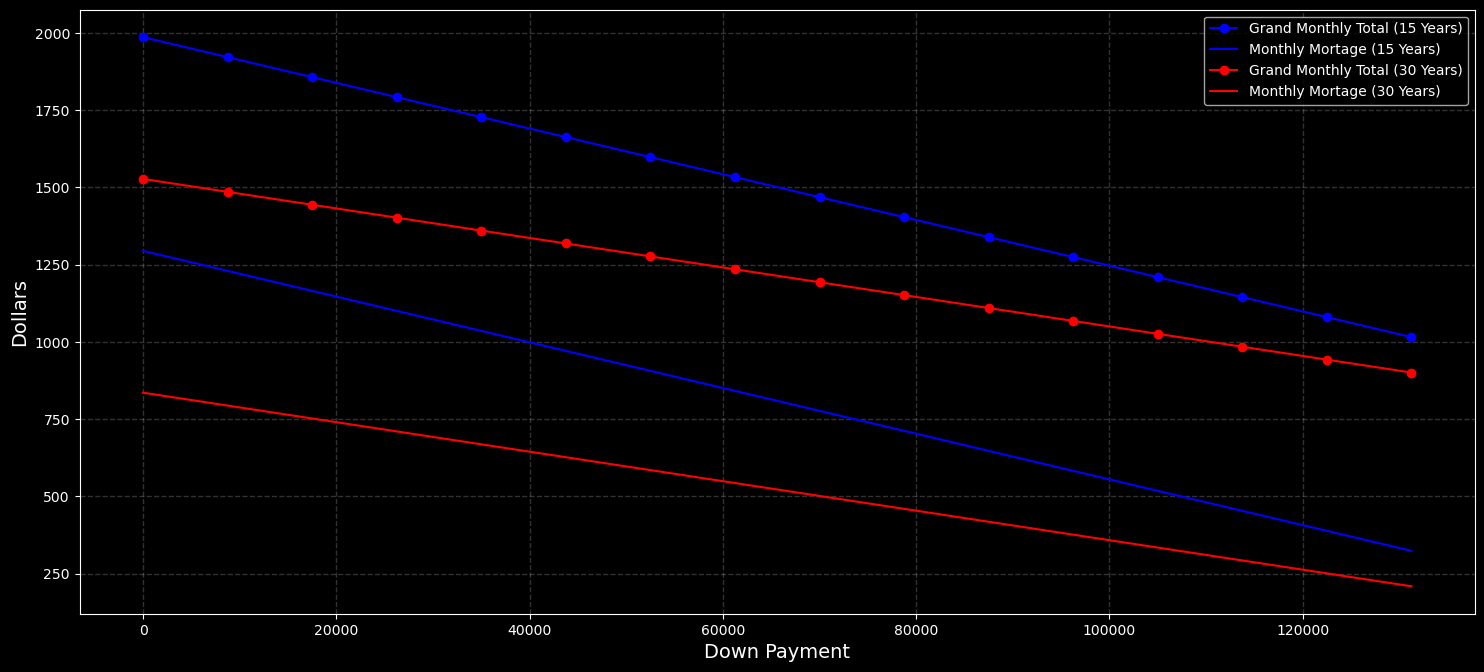

In [84]:
temp_15 = scenarioDF[scenarioDF['MORTGAGE_YEARS'] == 15]
temp_30 = scenarioDF[scenarioDF['MORTGAGE_YEARS'] == 30]

figure(figsize=(18, 8), dpi=100)
x = temp_15['DOWN_PAYMENT']
plt.plot(x, temp_15['GRAND_MONTHLY_TOTAL'], 'b', marker = 'o')
plt.plot(x, temp_15['MONTHLY_MORTAGE'], 'b', marker = None)

plt.plot(x, temp_30['GRAND_MONTHLY_TOTAL'], 'r', marker = 'o')
plt.plot(x, temp_30['MONTHLY_MORTAGE'], 'r', marker = None)
plt.legend(['Grand Monthly Total (15 Years)', 'Monthly Mortage (15 Years)', 'Grand Monthly Total (30 Years)', 'Monthly Mortage (30 Years)'])
plt.xlabel("Down Payment",fontsize=14)
plt.ylabel("Dollars",fontsize=14)
plt.grid(color='w', linestyle='--', linewidth=1, alpha = 0.2)

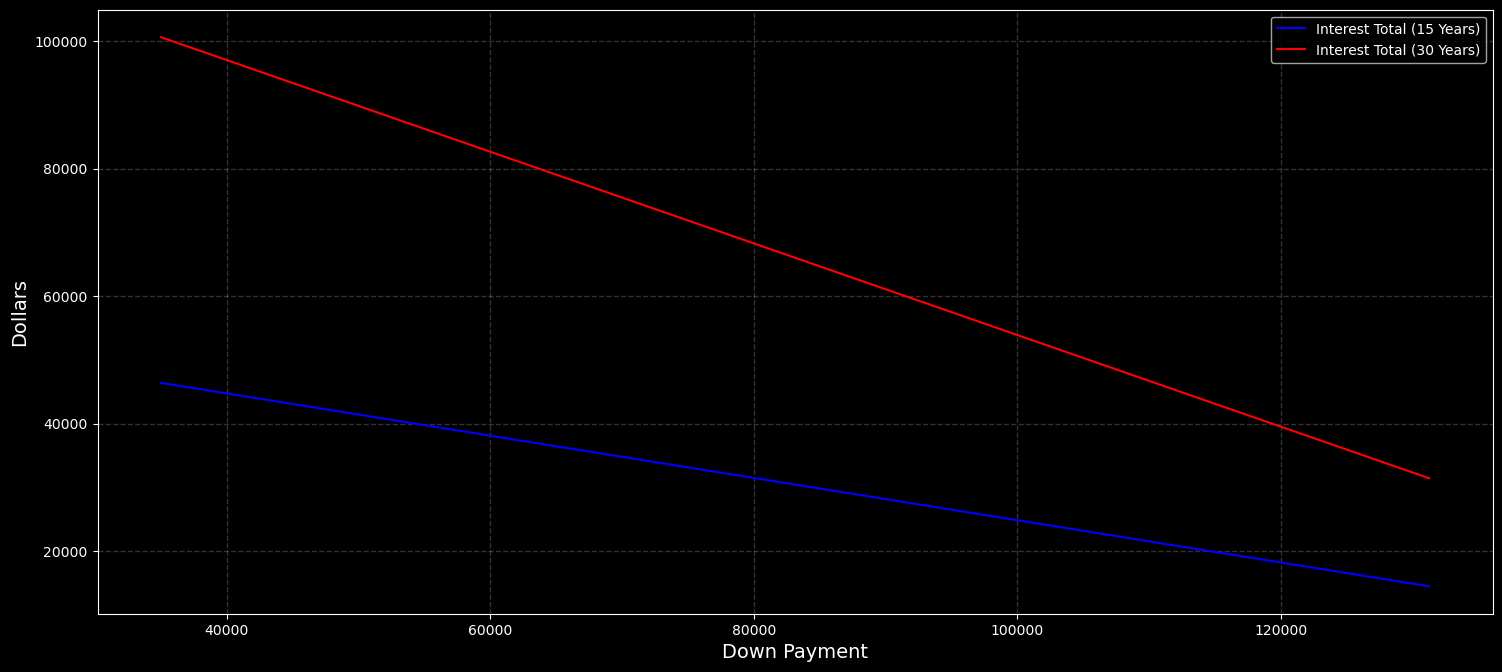

In [80]:
temp_15 = scenarioDF[scenarioDF['MORTGAGE_YEARS'] == 15]
temp_30 = scenarioDF[scenarioDF['MORTGAGE_YEARS'] == 30]

figure(figsize=(18, 8), dpi=100)
x = temp_15['DOWN_PAYMENT']
plt.plot(x, temp_15['INTEREST_TOTAL'], 'b', marker = None)

plt.plot(x, temp_30['INTEREST_TOTAL'], 'r', marker = None)
plt.legend(['Interest Total (15 Years)', 'Interest Total (30 Years)'])
plt.xlabel("Down Payment",fontsize=14)
plt.ylabel("Dollars",fontsize=14)
plt.grid(color='w', linestyle='--', linewidth=1, alpha = 0.2)